In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

# Zadanie 1

In [2]:
qnumber = 2

circ = QuantumCircuit(qnumber)

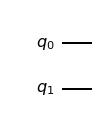

In [3]:
def apply_f0(circ):
    return circ

apply_f0(QuantumCircuit(qnumber)).draw("mpl")

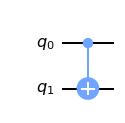

In [4]:
def apply_f1(circ):
    circ.cnot(0, 1)
    return circ

apply_f1(QuantumCircuit(qnumber)).draw("mpl")

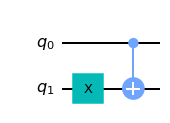

In [5]:
def apply_f2(circ):
    circ.x(1)
    circ.cnot(0, 1)
    return circ

apply_f2(QuantumCircuit(qnumber)).draw("mpl")

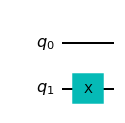

In [6]:
def apply_f3(circ):
    circ.x(1)
    return circ

apply_f3(QuantumCircuit(qnumber)).draw("mpl")

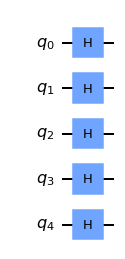

In [37]:
def hadamard_slice(circ):
    for i in range(len(circ.qubits)):
        circ.h(i)
    return circ

hadamard_slice(QuantumCircuit(qnumber)).draw("mpl")

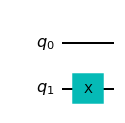

In [8]:
def send_one(circ):
    circ.x(1)
    return circ

send_one(QuantumCircuit(qnumber)).draw("mpl")

In [9]:
def get_deutch_circ(apply_f):
    deutch = QuantumCircuit(qnumber)
    send_one(deutch)
    deutch.barrier()
    hadamard_slice(deutch)
    deutch.barrier()
    apply_f(deutch)
    deutch.barrier()
    hadamard_slice(deutch)
    return deutch

In [3]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

def simulate(circ):
    circ.measure_all()
    backend = QasmSimulator()
    qc_compiled = transpile(circ, backend, optimization_level=3)
    job_sim = backend.run(qc_compiled, shots=1024)
    result_sim = job_sim.result()
    return result_sim.get_counts(qc_compiled)

In [11]:
def get_equation(circ):
    state = Statevector.from_int(0, 4)
    state = state.evolve(circ)
    return state

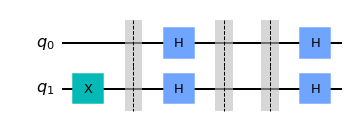

In [12]:
d0 = get_deutch_circ(apply_f0)
d0.draw("mpl")

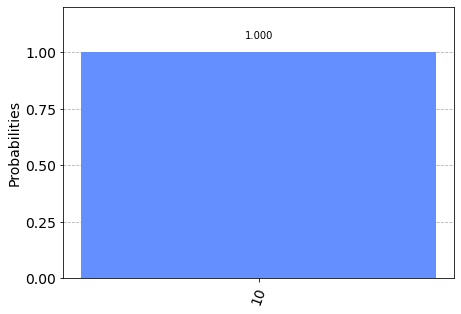

In [13]:
plot_histogram(simulate(d0))

 0 na qbicie wejściowym (górnym) - f. stała

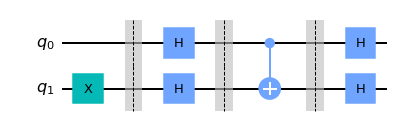

In [14]:
d1 =get_deutch_circ(apply_f1)
d1.draw("mpl")

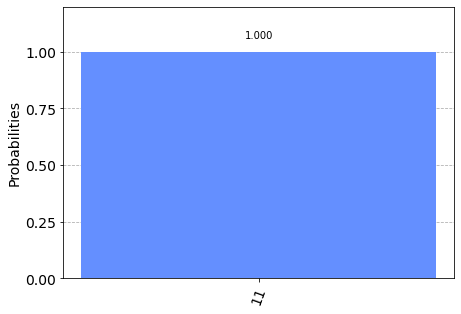

In [15]:
plot_histogram(simulate(d1))

1 na qubicie wejsciowym - f. zmienna

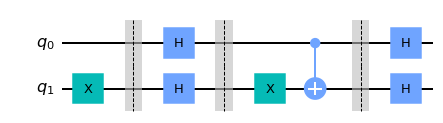

In [16]:
d2 = get_deutch_circ(apply_f2)
d2.draw("mpl")

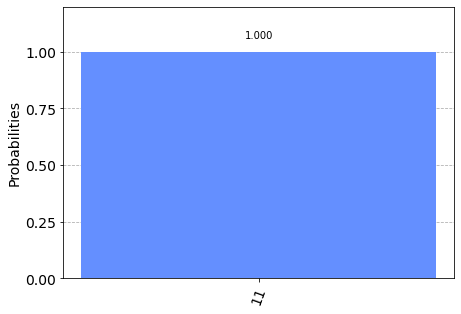

In [17]:
plot_histogram(simulate(d2))

1 na qubicie wejsciowym - f. zmienna

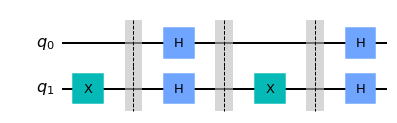

In [18]:
d3 = get_deutch_circ(apply_f3)
d3.draw("mpl")

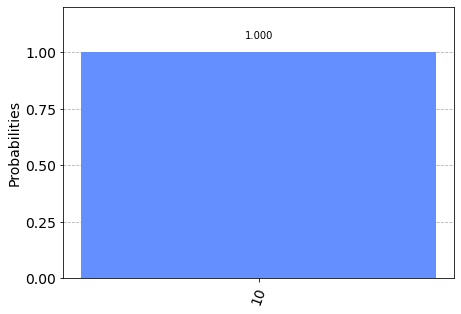

In [19]:
plot_histogram(simulate(d3))

0 na qubicie wejsciowym - f. stała

In [4]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
n=2

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits > n and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


In [5]:
from qiskit.tools.monitor import job_monitor

def run_on_machine(circ, backend):
    qc_compiled = transpile(circ, backend, optimization_level=1)
    job = backend.run(qc_compiled, shots=4096)
    job_monitor(job, interval = 1)
    result = job.result()
    return result.get_counts()

Job Status: job has successfully run


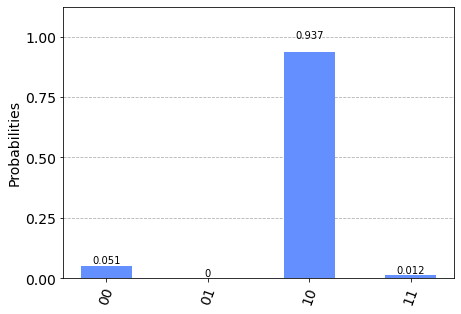

In [22]:
plot_histogram(run_on_machine(d0, backend))

Job Status: job has successfully run


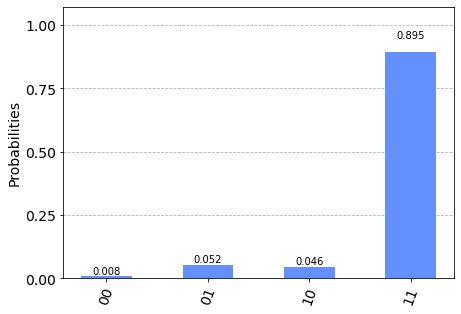

In [23]:
plot_histogram(run_on_machine(d1, backend))

Job Status: job has successfully run


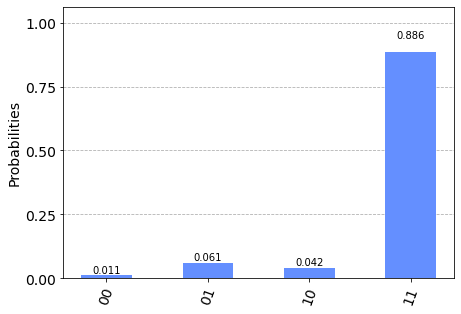

In [24]:
plot_histogram(run_on_machine(d2, backend))

Job Status: job has successfully run


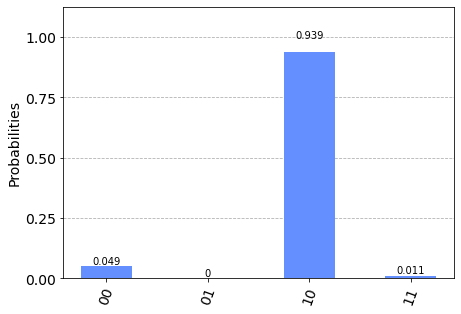

In [25]:
plot_histogram(run_on_machine(d3, backend))

# Zadanie 2

In [111]:
qnumber = 5

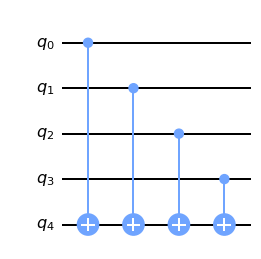

In [114]:
def get_bv_circ(circ, a, qnumber = 5):
    for i in range(qnumber - 1):
        if a[i]:
            circ.cnot(i, qnumber - 1)
    return circ

get_bv_circ(QuantumCircuit(qnumber), [True for i in range(qnumber - 1)], qnumber=qnumber).draw("mpl")

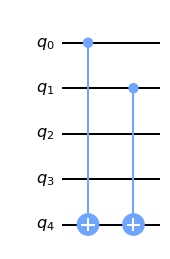

In [115]:
a_mermin = [True, True, False, False] # + [True]
get_bv_circ(QuantumCircuit(qnumber), a_mermin).draw("mpl")

In [ ]:
def classic_x(idx, a = a_mermin, qnumber=6):
    bv_classic = QuantumCircuit(qnumber)
    bv_classic.x(idx)
    bv_classic.barrier()
    bv_classic = get_bv_circ(bv_classic, a, qnumber)
    bv_classic.measure_all()
    return bv_classic

classic_x(0).draw("mpl")

In [ ]:
classic_x(4).draw("mpl")

In [ ]:
for i in range(5):
    print(simulate(classic_x(i)))
#expected 11001 on the oldest bit

In [99]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
n=4

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits > n and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2022-04-23 18:45:14,342: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_lima


In [100]:
qnumber = 5

circ = classic_x(0, qnumber=qnumber)

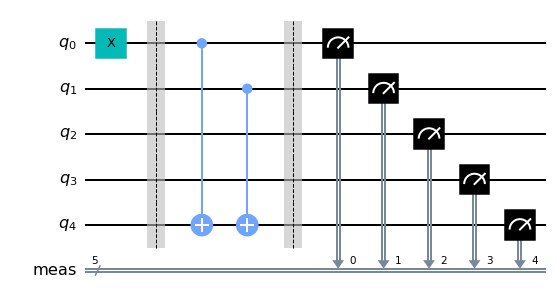

In [101]:
circ.draw("mpl")

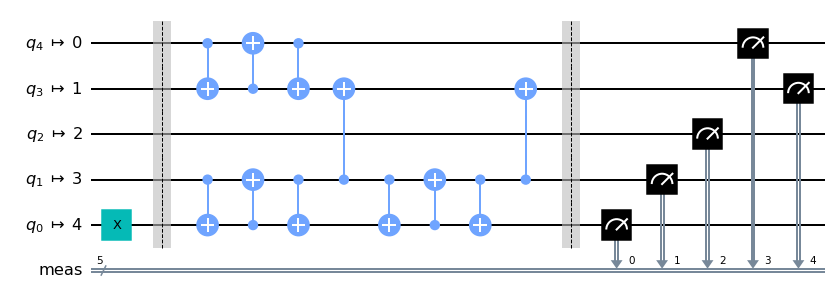

In [102]:
qc_compiled = transpile(circ, backend, optimization_level=1)
qc_compiled.draw("mpl")

In [103]:
job = backend.run(qc_compiled, shots=1024)
job_monitor(job, interval = 1)
result = job.result()

print(result)
print(result.get_counts())

Job Status: job has successfully run
Result(backend_name='ibmq_lima', backend_version='1.0.35', qobj_id='8cd5abde-3585-4dec-b660-45d2e0373bb1', job_id='62642d56d5bc396d32bc062f', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 22, '0x1': 61, '0x10': 127, '0x11': 691, '0x12': 10, '0x13': 24, '0x14': 1, '0x15': 3, '0x19': 6, '0x2': 24, '0x3': 47, '0x5': 2, '0x8': 1, '0x9': 4, '0xb': 1}), header=QobjExperimentHeader(clbit_labels=[['meas', 0], ['meas', 1], ['meas', 2], ['meas', 3], ['meas', 4]], creg_sizes=[['meas', 5]], global_phase=0.0, memory_slots=5, metadata={}, n_qubits=5, name='circuit-807', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2022-04-23 18:46:25+02:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_lima', backend_version='1.0.35'), execution_id='e70cb4ea-c324-11ec-b41e-b02628f7f59e', time_taken=4.680378675460815, error=None, client

Job Status: job has successfully run


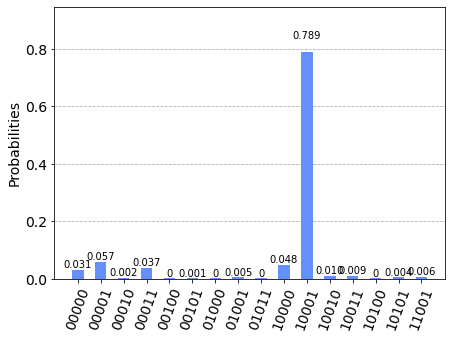

In [104]:
classic = classic_x(0, qnumber=qnumber)
classic.draw("mpl")
plot_histogram(run_on_machine(classic, backend))

1 na najstarszym qbicie więc a_0 = 1

Job Status: job has successfully run


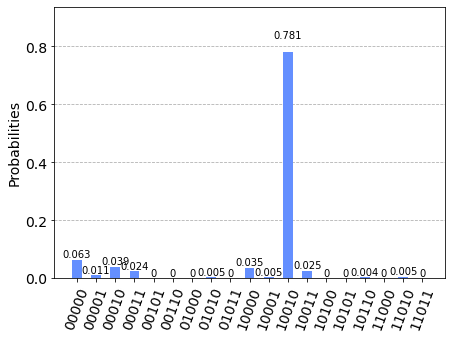

In [105]:
classic = classic_x(1, qnumber=qnumber)
classic.draw("mpl")
plot_histogram(run_on_machine(classic, backend))

1 na najstarszym qbicie więc a_1 = 1

Job Status: job has successfully run


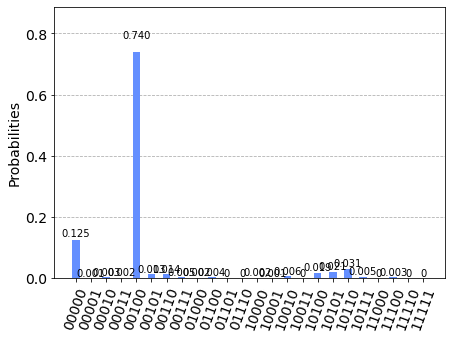

In [106]:
classic = classic_x(2, qnumber=qnumber)
classic.draw("mpl")
plot_histogram(run_on_machine(classic, backend))

0 na najstarszym qbicie więc a_2 = 0

Job Status: job has successfully run


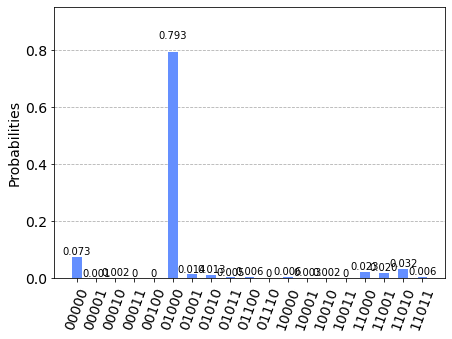

In [107]:
classic = classic_x(3, qnumber=qnumber)
classic.draw("mpl")
plot_histogram(run_on_machine(classic, backend))

0 na najstarszym qbicie więc a_3 = 0

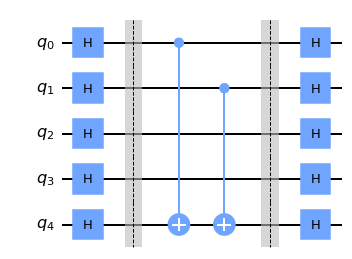

In [108]:
bv = QuantumCircuit(qnumber)
hadamard_slice(bv)
bv.barrier()
get_bv_circ(bv, a_mermin, qnumber)
bv.barrier()
hadamard_slice(bv)
bv.draw("mpl")

In [109]:
def quantum(qnumber = 6, a = a_mermin):
    bv = QuantumCircuit(qnumber)
    bv.x(qnumber - 1)
    bv.barrier()
    hadamard_slice(bv)
    bv.barrier()
    get_bv_circ(bv, a)
    bv.barrier()
    hadamard_slice(bv)
    bv.measure_all()
    return bv

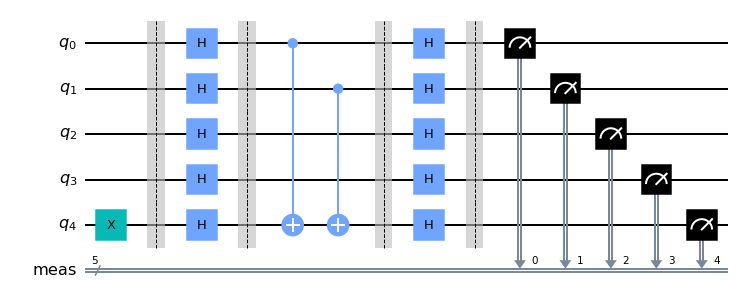

In [116]:
quantum(qnumber=5).draw('mpl')

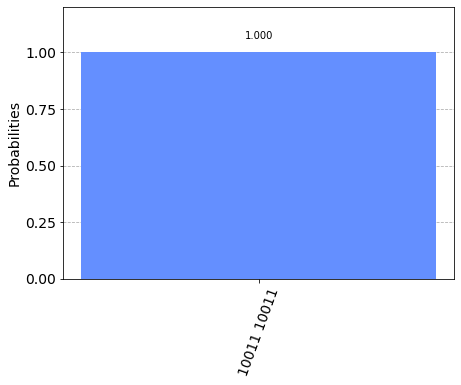

In [117]:
plot_histogram(simulate(quantum(qnumber=5)))

Job Status: job has successfully run


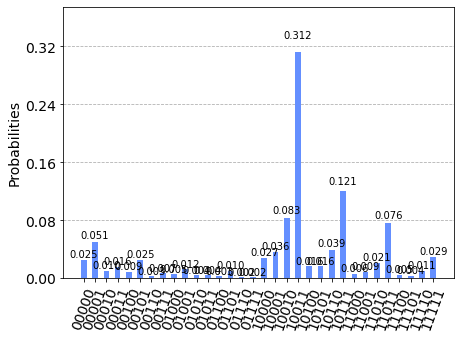

In [119]:
res = run_on_machine(quantum(qnumber=5), backend)
plot_histogram(res)

In [120]:
max(res, key=res.get)

'10011'